# Self-supervised learning by predicting image rotations

## Configuration

In [1]:
### Code importation

%run ../__init__.py
%run ../data.py
%run ../model.py
%run ../utils.py

print(f"Using {device} device")

Using cuda:0 device


In [2]:
# Check the version of Pytorch

print(f"Pytorch version: {torch.__version__}")

Pytorch version: 2.0.0


## Training

### MLPC

**Our baseline with the reduced dataset is a simple MLP classifier. That MLPC is more precisely trained on the features extracted from the reduced dataset. Later, if needed, we will also train a CNN on the reduced dataset to compare the quality of the extracted features.**

In [3]:
%%time

### Load the mentionned dataset

# Load the MNIST dataset
traindata, testdata = load_mnist(True)
# Reduce the number of samples per label
traindata_reduced = reduce_mnist(traindata)
# Extract the features from that dataset
traindata_extracted = extract_mnist(traindata_reduced)
testdata_extracted = extract_mnist(testdata)

# Check the size of the datasets
print("Size of the train dataset :", len(traindata_extracted), ",", traindata_extracted[0][0].shape,
      "\nSize of the test dataset :", len(testdata_extracted), ",", testdata_extracted[0][0].shape, "\n")

Size of the train dataset : 100 , torch.Size([112]) 
Size of the test dataset : 10000 , torch.Size([112]) 

CPU times: total: 3.14 s
Wall time: 4.54 s


In [4]:
# Train-test split

random_state = 42 # for reproducibility
traindata_extracted, validata_extracted = split_train_valid(traindata_extracted, 0.2, random_state, False)

In [5]:
# Load the datasets

trainloader = load_data(traindata_extracted, 20, True)
validloader = load_data(validata_extracted, 5)
testloader = load_data(testdata_extracted, 128)

mlpc = MLPC().to(device) # train on GPU

**This is our MLPC architecture and some of its properties :**

In [6]:
# Model summary

get_model_memory(mlpc)

MLPC(
  (linear1): Linear(in_features=112, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)
Model memory allocation : 2.00e+06

Total parameters : 23370
Training parameters : 23370


In [7]:
# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlpc.parameters(), lr = 0.01)

In [8]:
# MLPC training

epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : mlpc,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

mlpc, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

  5%|▌         | 1/20 [00:07<02:19,  7.32s/it]

| Epoch: 1/20 | Train: Loss 2.2568 Accuracy : 0.1375 | Val: Loss 2.2644 Accuracy : 0.1000



 10%|█         | 2/20 [00:12<01:50,  6.13s/it]

| Epoch: 2/20 | Train: Loss 1.9366 Accuracy : 0.3000 | Val: Loss 2.0086 Accuracy : 0.3000



 15%|█▌        | 3/20 [00:17<01:36,  5.71s/it]

| Epoch: 3/20 | Train: Loss 1.7402 Accuracy : 0.3500 | Val: Loss 1.8791 Accuracy : 0.3000



 20%|██        | 4/20 [00:22<01:25,  5.36s/it]

| Epoch: 4/20 | Train: Loss 1.5972 Accuracy : 0.4125 | Val: Loss 1.7029 Accuracy : 0.2000



 25%|██▌       | 5/20 [00:27<01:17,  5.17s/it]

| Epoch: 5/20 | Train: Loss 1.4105 Accuracy : 0.5125 | Val: Loss 1.6179 Accuracy : 0.3500



 30%|███       | 6/20 [00:32<01:10,  5.05s/it]

| Epoch: 6/20 | Train: Loss 1.3426 Accuracy : 0.4500 | Val: Loss 1.6486 Accuracy : 0.3500



 35%|███▌      | 7/20 [00:37<01:04,  4.97s/it]

| Epoch: 7/20 | Train: Loss 1.1315 Accuracy : 0.6125 | Val: Loss 1.4649 Accuracy : 0.5000



 40%|████      | 8/20 [00:41<00:59,  4.92s/it]

| Epoch: 8/20 | Train: Loss 1.0229 Accuracy : 0.7250 | Val: Loss 1.4010 Accuracy : 0.6500



 45%|████▌     | 9/20 [00:46<00:53,  4.89s/it]

| Epoch: 9/20 | Train: Loss 0.9971 Accuracy : 0.6625 | Val: Loss 1.4037 Accuracy : 0.5500



 50%|█████     | 10/20 [00:51<00:48,  4.86s/it]

| Epoch: 10/20 | Train: Loss 0.9713 Accuracy : 0.7125 | Val: Loss 1.2980 Accuracy : 0.5000



 55%|█████▌    | 11/20 [00:56<00:43,  4.85s/it]

| Epoch: 11/20 | Train: Loss 0.8410 Accuracy : 0.7375 | Val: Loss 1.2863 Accuracy : 0.5000



 60%|██████    | 12/20 [01:01<00:38,  4.82s/it]

| Epoch: 12/20 | Train: Loss 0.7218 Accuracy : 0.8250 | Val: Loss 1.1692 Accuracy : 0.6000



 65%|██████▌   | 13/20 [01:05<00:33,  4.81s/it]

| Epoch: 13/20 | Train: Loss 0.8080 Accuracy : 0.7250 | Val: Loss 1.2936 Accuracy : 0.6000



 70%|███████   | 14/20 [01:10<00:28,  4.80s/it]

| Epoch: 14/20 | Train: Loss 0.6619 Accuracy : 0.8250 | Val: Loss 1.1212 Accuracy : 0.7000



 75%|███████▌  | 15/20 [01:15<00:23,  4.79s/it]

| Epoch: 15/20 | Train: Loss 0.7634 Accuracy : 0.7750 | Val: Loss 1.2234 Accuracy : 0.6500



 80%|████████  | 16/20 [01:20<00:19,  4.79s/it]

| Epoch: 16/20 | Train: Loss 0.5664 Accuracy : 0.8125 | Val: Loss 1.2281 Accuracy : 0.5500



 85%|████████▌ | 17/20 [01:24<00:14,  4.78s/it]

| Epoch: 17/20 | Train: Loss 0.4201 Accuracy : 0.9250 | Val: Loss 1.0213 Accuracy : 0.6000



 90%|█████████ | 18/20 [01:29<00:09,  4.77s/it]

| Epoch: 18/20 | Train: Loss 0.3990 Accuracy : 0.8625 | Val: Loss 0.9001 Accuracy : 0.6500



 95%|█████████▌| 19/20 [01:34<00:04,  4.77s/it]

| Epoch: 19/20 | Train: Loss 0.4178 Accuracy : 0.8750 | Val: Loss 1.2349 Accuracy : 0.6000



100%|██████████| 20/20 [01:39<00:00,  4.96s/it]

| Epoch: 20/20 | Train: Loss 0.3231 Accuracy : 0.9000 | Val: Loss 0.9226 Accuracy : 0.6500



**After the training, we obtained the following results :**

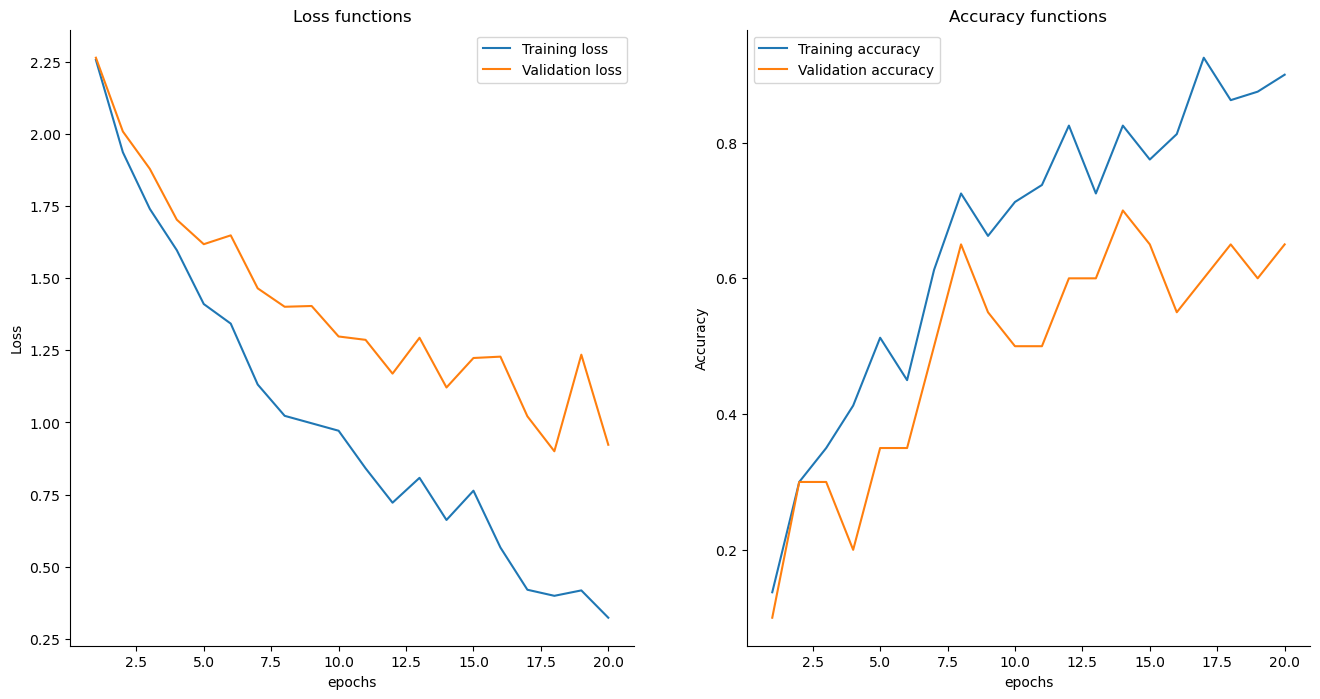

In [9]:
# Plot the loss and accuracy (at each epoch) for both datasets

plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

**It seems that our model is not that robust. This is mainly due to the lack of information while training (even so, we notice that our model learns well with few labels).**

In [10]:
# Save the MLPC model

save_model(mlpc, "../save/models/mlpc.pth")

**Let's finally evaluate our model on the test dataset :**

Classification report :
              precision    recall  f1-score   support

     Class 0       0.86      0.43      0.58       980
     Class 1       0.68      0.97      0.80      1135
     Class 2       0.66      0.56      0.61      1032
     Class 3       0.54      0.48      0.51      1010
     Class 4       0.64      0.65      0.65       982
     Class 5       0.77      0.52      0.62       892
     Class 6       0.76      0.91      0.83       958
     Class 7       0.68      0.82      0.74      1028
     Class 8       0.47      0.55      0.51       974
     Class 9       0.61      0.59      0.60      1009

    accuracy                           0.66     10000
   macro avg       0.67      0.65      0.64     10000
weighted avg       0.67      0.66      0.65     10000



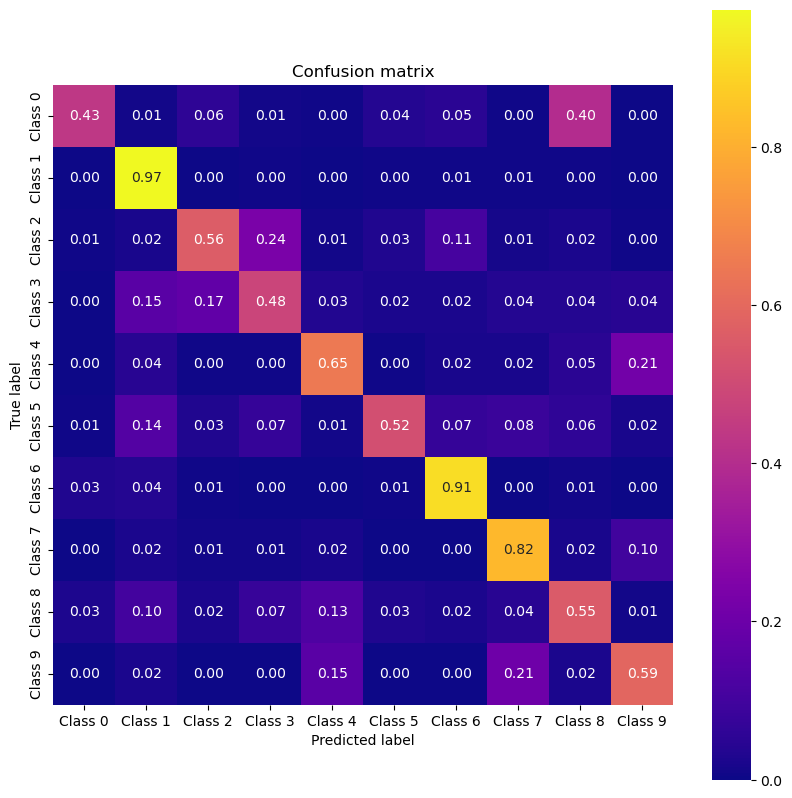

In [11]:
# Evaluate the MLPC model

evaluate_model(mlpc, testloader, device)

**The results are reasonable for a model trained with few labels. Let's even so try a CNN in the next section with our reduced dataset.**

### CNN

In [5]:
### Dataset and model preparation

# Check the size of the datasets
print("Size of the train dataset :", len(traindata_reduced), ",", traindata_reduced[0][0].shape,
      "\nSize of the test dataset :", len(testdata), ",", testdata[0][0].shape, "\n")

# Train-test split
traindata_reduced, validata_reduced = split_train_valid(traindata_reduced, 0.2, random_state)

# Load the datasets
trainloader = load_data(traindata_reduced, 80, True, 0)
validloader = load_data(validata_reduced, 20, False, 0)
testloader = load_data(testdata, 128, False, 0)

Size of the train dataset : 100 , torch.Size([1, 28, 28]) 
Size of the test dataset : 10000 , torch.Size([1, 28, 28]) 



In [10]:
# Model summary

cnn = CNN().to(device)
get_model_memory(cnn)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=1024, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)
Model memory allocation : 1.02e+08

Total parameters : 6443370
Training parameters : 6443370


**First of all, we notice that we need more parameters to train this model.**

In [11]:
### Model training

# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

# CNN training
epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : cnn,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

cnn, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

# Save the CNN model
save_model(cnn, "../save/models/cnn.pth")

 10%|█         | 2/20 [00:00<00:02,  8.64it/s]

| Epoch: 1/20 | Train: Loss 4.4046 Accuracy : 0.2000 | Val: Loss 4.5800 Accuracy : 0.2000

| Epoch: 2/20 | Train: Loss 6.2817 Accuracy : 0.3125 | Val: Loss 6.3919 Accuracy : 0.2500

| Epoch: 3/20 | Train: Loss 2.1708 Accuracy : 0.4125 | Val: Loss 2.2282 Accuracy : 0.3500

| Epoch: 4/20 | Train: Loss 1.9786 Accuracy : 0.6375 | Val: Loss 2.0600 Accuracy : 0.5500

| Epoch: 5/20 | Train: Loss 1.7374 Accuracy : 0.6000 | Val: Loss 1.9099 Accuracy : 0.5000



 60%|██████    | 12/20 [00:00<00:00, 32.63it/s]

| Epoch: 6/20 | Train: Loss 1.0433 Accuracy : 0.8375 | Val: Loss 1.2938 Accuracy : 0.6500

| Epoch: 7/20 | Train: Loss 0.4932 Accuracy : 0.9375 | Val: Loss 0.7702 Accuracy : 0.8000

| Epoch: 8/20 | Train: Loss 0.2517 Accuracy : 0.9375 | Val: Loss 0.3630 Accuracy : 0.9500

| Epoch: 9/20 | Train: Loss 0.1199 Accuracy : 0.9625 | Val: Loss 0.2691 Accuracy : 0.8500

| Epoch: 10/20 | Train: Loss 0.0788 Accuracy : 0.9625 | Val: Loss 0.3791 Accuracy : 0.9000

| Epoch: 11/20 | Train: Loss 0.0187 Accuracy : 1.0000 | Val: Loss 0.4115 Accuracy : 0.8500

| Epoch: 12/20 | Train: Loss 0.0422 Accuracy : 0.9875 | Val: Loss 0.5064 Accuracy : 0.9000

| Epoch: 13/20 | Train: Loss 0.0081 Accuracy : 1.0000 | Val: Loss 0.4150 Accuracy : 0.8500

| Epoch: 14/20 | Train: Loss 0.0066 Accuracy : 1.0000 | Val: Loss 0.4270 Accuracy : 0.9000

| Epoch: 15/20 | Train: Loss 0.0135 Accuracy : 1.0000 | Val: Loss 0.6803 Accuracy : 0.8000



100%|██████████| 20/20 [00:00<00:00, 31.67it/s]


| Epoch: 16/20 | Train: Loss 0.0016 Accuracy : 1.0000 | Val: Loss 0.5918 Accuracy : 0.9000

| Epoch: 17/20 | Train: Loss 0.0006 Accuracy : 1.0000 | Val: Loss 0.3011 Accuracy : 0.8000

| Epoch: 18/20 | Train: Loss 0.0048 Accuracy : 1.0000 | Val: Loss 0.7071 Accuracy : 0.8500

| Epoch: 19/20 | Train: Loss 0.0081 Accuracy : 1.0000 | Val: Loss 0.8924 Accuracy : 0.7500

| Epoch: 20/20 | Train: Loss 0.0011 Accuracy : 1.0000 | Val: Loss 0.5233 Accuracy : 0.9000



**Yet, contrary to what one might have thought, this model is much faster to train than the MLPC (maybe because there are few images or maybe because this model suits image datasets better).**

Classification report :
              precision    recall  f1-score   support

     Class 0       0.79      0.93      0.86       980
     Class 1       0.99      0.72      0.83      1135
     Class 2       0.60      0.89      0.72      1032
     Class 3       0.69      0.50      0.58      1010
     Class 4       0.93      0.62      0.75       982
     Class 5       0.80      0.29      0.43       892
     Class 6       0.97      0.63      0.76       958
     Class 7       0.91      0.75      0.82      1028
     Class 8       0.44      0.85      0.58       974
     Class 9       0.62      0.88      0.73      1009

    accuracy                           0.71     10000
   macro avg       0.77      0.71      0.70     10000
weighted avg       0.78      0.71      0.71     10000



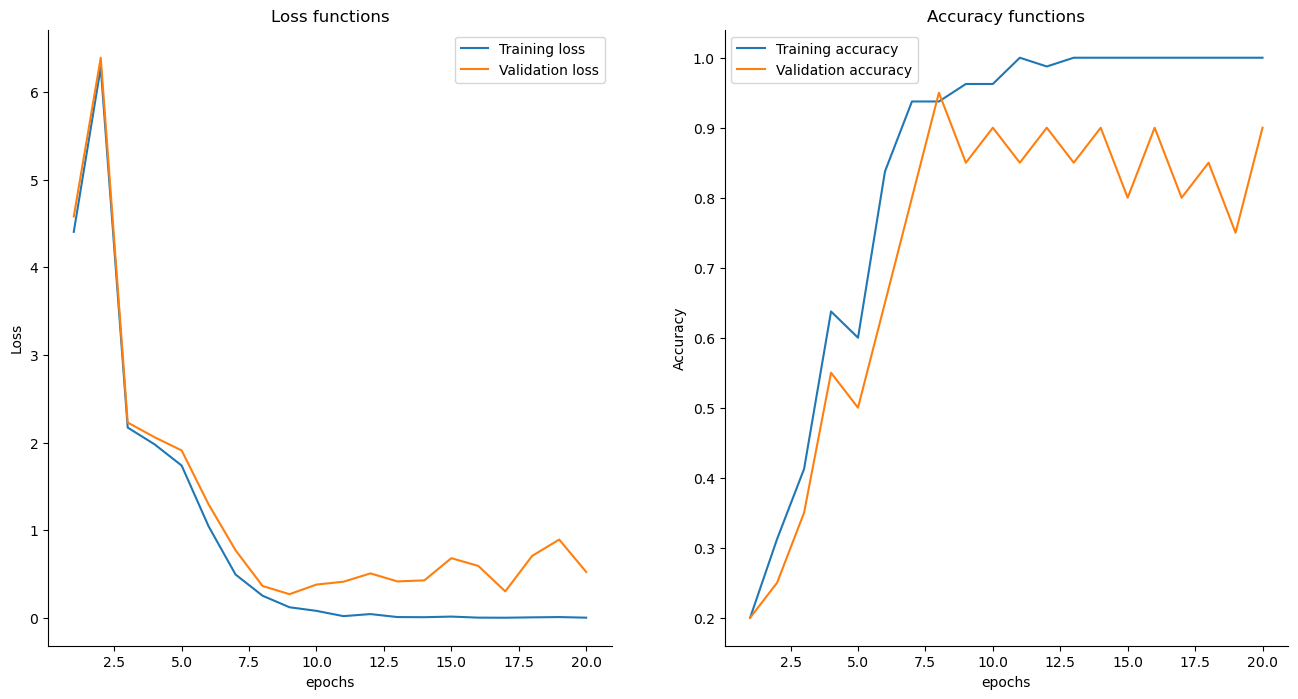

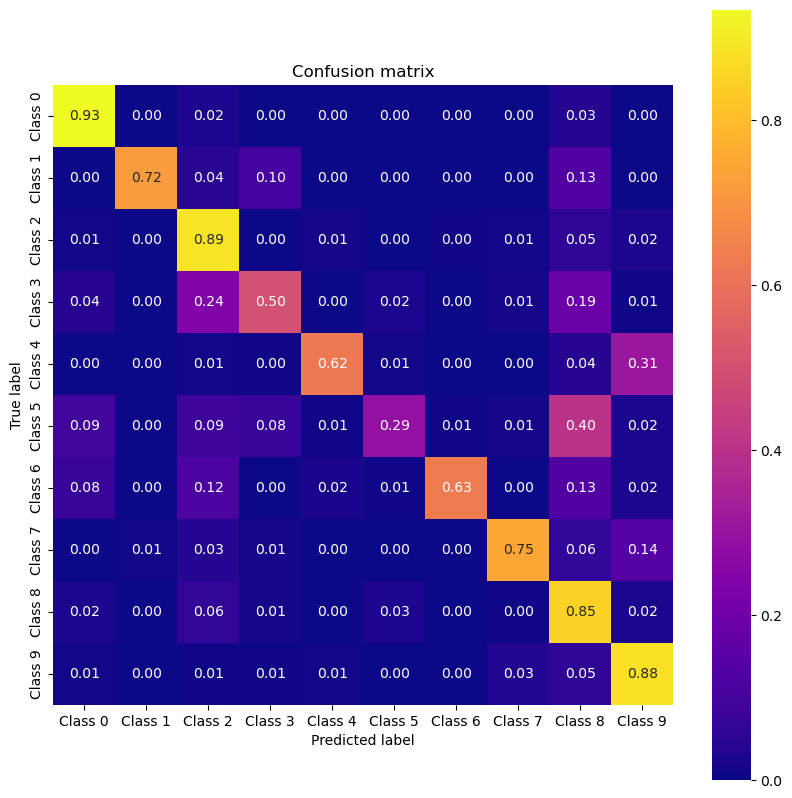

In [12]:
### Model evaluation

# Plot the loss and accuracy (at each epoch) for both datasets
plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

# Evaluate the cnn model
evaluate_model(cnn, testloader, device)

**We observe that the CNN is a bit better than the MLPC. Thus, the choice of the model should be made according to the specifications (take the fastest one, the least expensive, the one that classifies better specific numbers, ...)**

### RotNet

#### First step : predict the rotation of the images

**First, we will implement a CNN composed of blocks of convolution to predict the rotation of the image :**

In [5]:
### Dataset and model preparation

# Dataset adapted to rotation problem
traindata_rotated = rotate_mnist(traindata)
testdata_rotated = rotate_mnist(testdata)

# Train-test split
traindata_rotated, validata_rotated = split_train_valid(traindata_rotated, 0.2, random_state)

# Check the size of the datasets
print("Size of the train dataset :", len(traindata_rotated), ",", traindata_rotated[0][0].shape,
      "\nSize of the validation dataset :", len(validata_rotated), ",", validata_rotated[0][0].shape,
      "\nSize of the test dataset :", len(testdata_rotated), ",", testdata_rotated[0][0].shape, "\n")

# Load the datasets
trainloader = load_data(traindata_rotated, 256, True, 0)
validloader = load_data(validata_rotated, 256, False, 0)
testloader = load_data(testdata_rotated, 256, False, 0)

Size of the train dataset : 192000 , torch.Size([1, 28, 28]) 
Size of the validation dataset : 48000 , torch.Size([1, 28, 28]) 
Size of the test dataset : 40000 , torch.Size([1, 28, 28]) 



**We built an easier architecture compared to the main reference about Rotnet (they took at least three blocks). As you will see below, we chose only two blocks of convolutionnal layers :**

In [6]:
# Model summary

rotnet = ROTNET().to(device)
get_model_memory(rotnet)

ROTNET(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=4, bias=True)
)
Model memory allocation : 3.46e+06

Total parameters : 3327556
Training parameters : 3327556


**Furthermore, our model is trained with a different dataset (they built RotNet with CIFAR-10). As a consequence, the reference parameters are not necessarily the best ones for the MNIST dataset. For instance, we noticed that Adam optimizer seems better than SGD.**

In [7]:
### Model training

# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rotnet.parameters(), lr = 0.01)

# CNN training
epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : rotnet,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

rotnet, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

# Save the CNN model
save_model(rotnet, "../save/models/rotnet_prime.pth")

  5%|▌         | 1/20 [00:28<08:59, 28.37s/it]

| Epoch: 1/20 | Train: Loss 0.0869 Accuracy : 0.9707 | Val: Loss 0.0896 Accuracy : 0.9689



 10%|█         | 2/20 [00:52<07:42, 25.69s/it]

| Epoch: 2/20 | Train: Loss 0.0661 Accuracy : 0.9762 | Val: Loss 0.0714 Accuracy : 0.9743



 15%|█▌        | 3/20 [01:14<06:51, 24.19s/it]

| Epoch: 3/20 | Train: Loss 0.0782 Accuracy : 0.9718 | Val: Loss 0.0848 Accuracy : 0.9697



 20%|██        | 4/20 [01:34<06:00, 22.53s/it]

| Epoch: 4/20 | Train: Loss 0.0458 Accuracy : 0.9835 | Val: Loss 0.0511 Accuracy : 0.9816



 25%|██▌       | 5/20 [01:54<05:23, 21.56s/it]

| Epoch: 5/20 | Train: Loss 0.0419 Accuracy : 0.9852 | Val: Loss 0.0481 Accuracy : 0.9834



 30%|███       | 6/20 [02:14<04:54, 21.02s/it]

| Epoch: 6/20 | Train: Loss 0.0428 Accuracy : 0.9850 | Val: Loss 0.0464 Accuracy : 0.9837



 35%|███▌      | 7/20 [02:37<04:40, 21.58s/it]

| Epoch: 7/20 | Train: Loss 0.0352 Accuracy : 0.9873 | Val: Loss 0.0422 Accuracy : 0.9852



 40%|████      | 8/20 [02:57<04:13, 21.09s/it]

| Epoch: 8/20 | Train: Loss 0.0404 Accuracy : 0.9854 | Val: Loss 0.0460 Accuracy : 0.9837



 45%|████▌     | 9/20 [03:16<03:47, 20.66s/it]

| Epoch: 9/20 | Train: Loss 0.0476 Accuracy : 0.9831 | Val: Loss 0.0545 Accuracy : 0.9811



 50%|█████     | 10/20 [03:36<03:23, 20.35s/it]

| Epoch: 10/20 | Train: Loss 0.0333 Accuracy : 0.9879 | Val: Loss 0.0398 Accuracy : 0.9860



 55%|█████▌    | 11/20 [03:56<03:00, 20.11s/it]

| Epoch: 11/20 | Train: Loss 0.0407 Accuracy : 0.9854 | Val: Loss 0.0466 Accuracy : 0.9836



 60%|██████    | 12/20 [04:15<02:39, 19.97s/it]

| Epoch: 12/20 | Train: Loss 0.0338 Accuracy : 0.9877 | Val: Loss 0.0406 Accuracy : 0.9859



 65%|██████▌   | 13/20 [04:35<02:19, 19.92s/it]

| Epoch: 13/20 | Train: Loss 0.0504 Accuracy : 0.9824 | Val: Loss 0.0590 Accuracy : 0.9804



 70%|███████   | 14/20 [04:55<01:59, 19.87s/it]

| Epoch: 14/20 | Train: Loss 0.0418 Accuracy : 0.9848 | Val: Loss 0.0512 Accuracy : 0.9821



 75%|███████▌  | 15/20 [05:14<01:39, 19.81s/it]

| Epoch: 15/20 | Train: Loss 0.0394 Accuracy : 0.9859 | Val: Loss 0.0481 Accuracy : 0.9835



 80%|████████  | 16/20 [05:34<01:19, 19.76s/it]

| Epoch: 16/20 | Train: Loss 0.0372 Accuracy : 0.9865 | Val: Loss 0.0457 Accuracy : 0.9838



 85%|████████▌ | 17/20 [05:54<00:59, 19.72s/it]

| Epoch: 17/20 | Train: Loss 0.0703 Accuracy : 0.9770 | Val: Loss 0.0813 Accuracy : 0.9748



 90%|█████████ | 18/20 [06:13<00:39, 19.69s/it]

| Epoch: 18/20 | Train: Loss 0.0271 Accuracy : 0.9901 | Val: Loss 0.0352 Accuracy : 0.9874



 95%|█████████▌| 19/20 [06:33<00:19, 19.70s/it]

| Epoch: 19/20 | Train: Loss 0.0281 Accuracy : 0.9899 | Val: Loss 0.0393 Accuracy : 0.9868



100%|██████████| 20/20 [06:53<00:00, 20.68s/it]

| Epoch: 20/20 | Train: Loss 0.0290 Accuracy : 0.9897 | Val: Loss 0.0406 Accuracy : 0.9864



**Among all our models, this one is the slowest to train (maybe because they are more labeled images/ 4 times more).**

Classification report :
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     10000
     Class 1       0.99      0.99      0.99     10000
     Class 2       0.99      0.98      0.99     10000
     Class 3       0.98      0.99      0.99     10000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



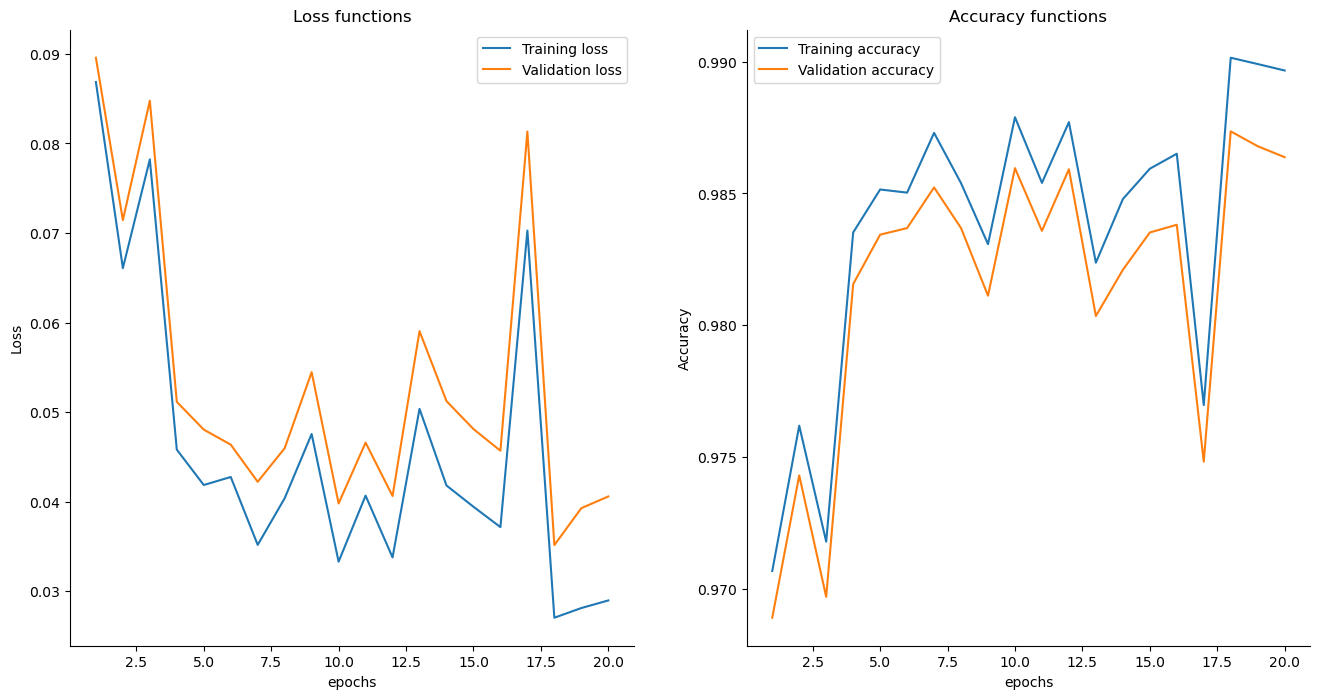

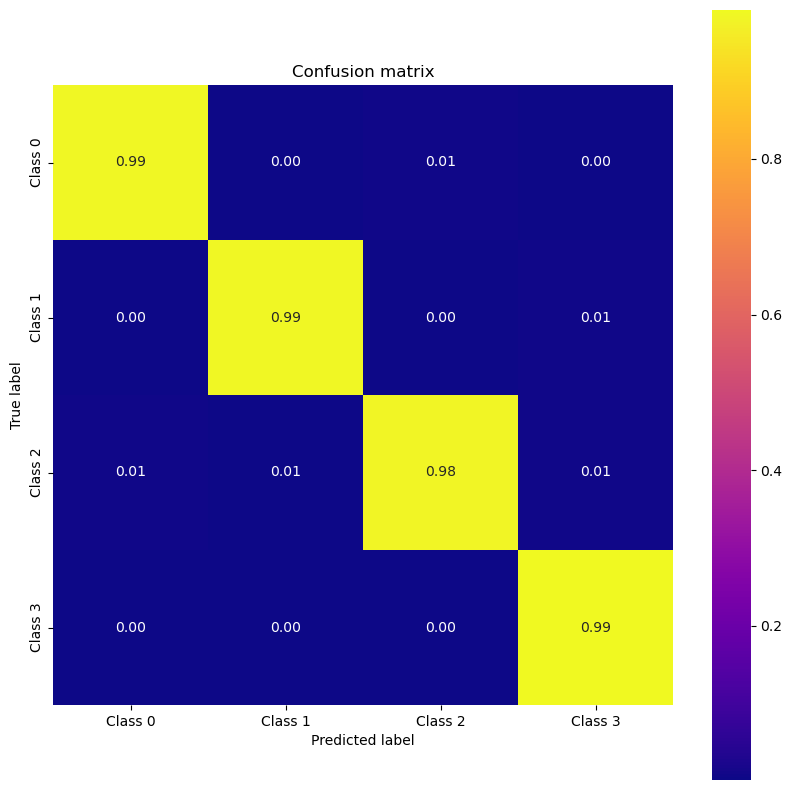

In [10]:
### Model evaluation

# Plot the loss and accuracy (at each epoch) for both datasets
plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

# Evaluate the cnn model
evaluate_model(rotnet, testloader, device, 4)

**For the first step, we remark that our model is almost excellent to predict image rotations (0.99 of accuracy with the test). So we hope that our final model will be as efficient as the this one.**

#### Second step : transfer learning with the reduced dataset

**Then, we will do a transfert learning for the digit recognition task :**

In [11]:
### Fine tuning of the pre-trained model

rotnet = ROTNET().to(device)
rotnet.load_state_dict(torch.load("../save/models/rotnet_prime.pth", map_location = device))

# Show the parameters of the model
params = rotnet.state_dict()
params.keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'conv4.weight', 'conv4.bias', 'conv5.weight', 'conv5.bias', 'conv6.weight', 'conv6.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

**All we have to do is to freeze the parameters of the convolutionnal layers and to train only the last layers of our model :**

In [12]:
# Freeze some parameters of the model

for name, param in rotnet.named_parameters() :
    if param.requires_grad and 'conv' in name :
        param.requires_grad = False

In [13]:
# Check whether parameters are well frozen or not

for name, param in rotnet.named_parameters() :
    print(name, param.requires_grad)

conv1.weight False
conv1.bias False
conv2.weight False
conv2.bias False
conv3.weight False
conv3.bias False
conv4.weight False
conv4.bias False
conv5.weight False
conv5.bias False
conv6.weight False
conv6.bias False
fc1.weight True
fc1.bias True
fc2.weight True
fc2.bias True


**Thus, the architecture of our RotNet looks like this :**

In [14]:
### Update the output dimension of the last layer

# Retrieve the number of input features in last fully connected layer
number_features_last_layer = rotnet.fc2.in_features
# Reinitialize the last layer with correct number of outputs
rotnet.fc2 = nn.Linear(number_features_last_layer, 10)

# Model summary
rotnet = rotnet.to(device)
get_model_memory(rotnet)

ROTNET(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)
Model memory allocation : 2.87e+08

Total parameters : 3333706
Training parameters : 3222538


In [16]:
### Dataset and model preparation

# Check the size of the datasets
print("Size of the train dataset :", len(traindata_reduced), ",", traindata_reduced[0][0].shape,
      "\nSize of the validation dataset :", len(validata_reduced), ",", validata_reduced[0][0].shape,
      "\nSize of the test dataset :", len(testdata), ",", testdata[0][0].shape, "\n")

# Load the datasets
trainloader = load_data(traindata_reduced, 80, True, 0)
validloader = load_data(validata_reduced, 20, False, 0)
testloader = load_data(testdata, 128, False, 0)

Size of the train dataset : 80 , torch.Size([1, 28, 28]) 
Size of the validation dataset : 20 , torch.Size([1, 28, 28]) 
Size of the test dataset : 10000 , torch.Size([1, 28, 28]) 



In [17]:
### Model training

# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, rotnet.parameters()), lr = 0.01)

# CNN training
epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : rotnet,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

rotnet, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

# Save the CNN model
save_model(rotnet, "../save/models/rotnet.pth")

 15%|█▌        | 3/20 [00:00<00:01, 13.39it/s]

| Epoch: 1/20 | Train: Loss 2.0247 Accuracy : 0.4125 | Val: Loss 2.0911 Accuracy : 0.3500

| Epoch: 2/20 | Train: Loss 1.7080 Accuracy : 0.7250 | Val: Loss 1.8863 Accuracy : 0.5000

| Epoch: 3/20 | Train: Loss 1.4127 Accuracy : 0.7875 | Val: Loss 1.6898 Accuracy : 0.7000

| Epoch: 4/20 | Train: Loss 1.1448 Accuracy : 0.8125 | Val: Loss 1.5029 Accuracy : 0.7000

| Epoch: 5/20 | Train: Loss 0.9153 Accuracy : 0.8375 | Val: Loss 1.3345 Accuracy : 0.7000

| Epoch: 6/20 | Train: Loss 0.7289 Accuracy : 0.8750 | Val: Loss 1.1964 Accuracy : 0.7000

| Epoch: 7/20 | Train: Loss 0.5814 Accuracy : 0.8875 | Val: Loss 1.0966 Accuracy : 0.7000



 70%|███████   | 14/20 [00:00<00:00, 37.21it/s]

| Epoch: 8/20 | Train: Loss 0.4649 Accuracy : 0.9250 | Val: Loss 1.0281 Accuracy : 0.7000

| Epoch: 9/20 | Train: Loss 0.3712 Accuracy : 0.9500 | Val: Loss 0.9759 Accuracy : 0.6500

| Epoch: 10/20 | Train: Loss 0.2950 Accuracy : 0.9625 | Val: Loss 0.9286 Accuracy : 0.6500

| Epoch: 11/20 | Train: Loss 0.2317 Accuracy : 0.9750 | Val: Loss 0.8803 Accuracy : 0.6500

| Epoch: 12/20 | Train: Loss 0.1791 Accuracy : 0.9875 | Val: Loss 0.8358 Accuracy : 0.7000

| Epoch: 13/20 | Train: Loss 0.1363 Accuracy : 0.9875 | Val: Loss 0.7971 Accuracy : 0.7000

| Epoch: 14/20 | Train: Loss 0.1022 Accuracy : 1.0000 | Val: Loss 0.7668 Accuracy : 0.7000

| Epoch: 15/20 | Train: Loss 0.0762 Accuracy : 1.0000 | Val: Loss 0.7449 Accuracy : 0.7500

| Epoch: 16/20 | Train: Loss 0.0571 Accuracy : 1.0000 | Val: Loss 0.7329 Accuracy : 0.7500

| Epoch: 17/20 | Train: Loss 0.0433 Accuracy : 1.0000 | Val: Loss 0.7299 Accuracy : 0.8000

| Epoch: 18/20 | Train: Loss 0.0331 Accuracy : 1.0000 | Val: Loss 0.7346 Accuracy 

100%|██████████| 20/20 [00:00<00:00, 34.87it/s]

| Epoch: 19/20 | Train: Loss 0.0255 Accuracy : 1.0000 | Val: Loss 0.7474 Accuracy : 0.8000

| Epoch: 20/20 | Train: Loss 0.0199 Accuracy : 1.0000 | Val: Loss 0.7645 Accuracy : 0.8000



Classification report :
              precision    recall  f1-score   support

     Class 0       0.86      0.93      0.90       980
     Class 1       0.98      0.88      0.93      1135
     Class 2       0.88      0.74      0.80      1032
     Class 3       0.58      0.87      0.70      1010
     Class 4       0.88      0.82      0.85       982
     Class 5       0.59      0.52      0.55       892
     Class 6       0.83      0.90      0.86       958
     Class 7       0.86      0.75      0.80      1028
     Class 8       0.58      0.46      0.51       974
     Class 9       0.72      0.81      0.76      1009

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



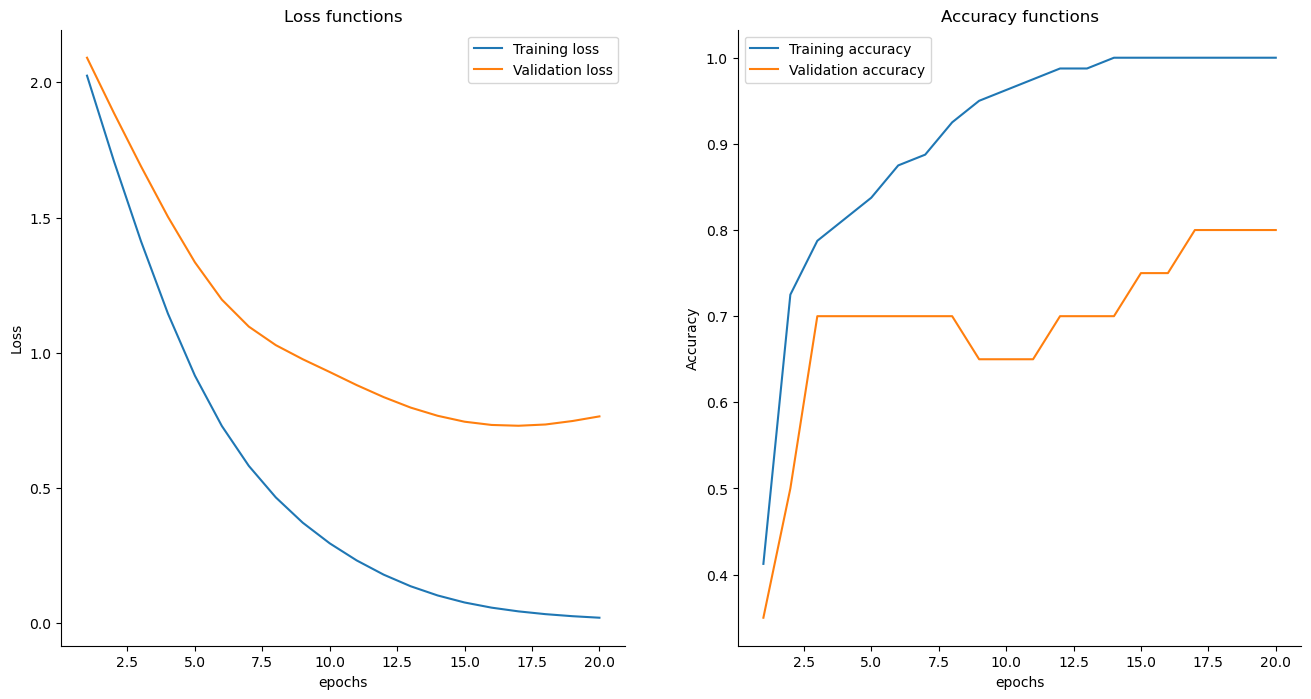

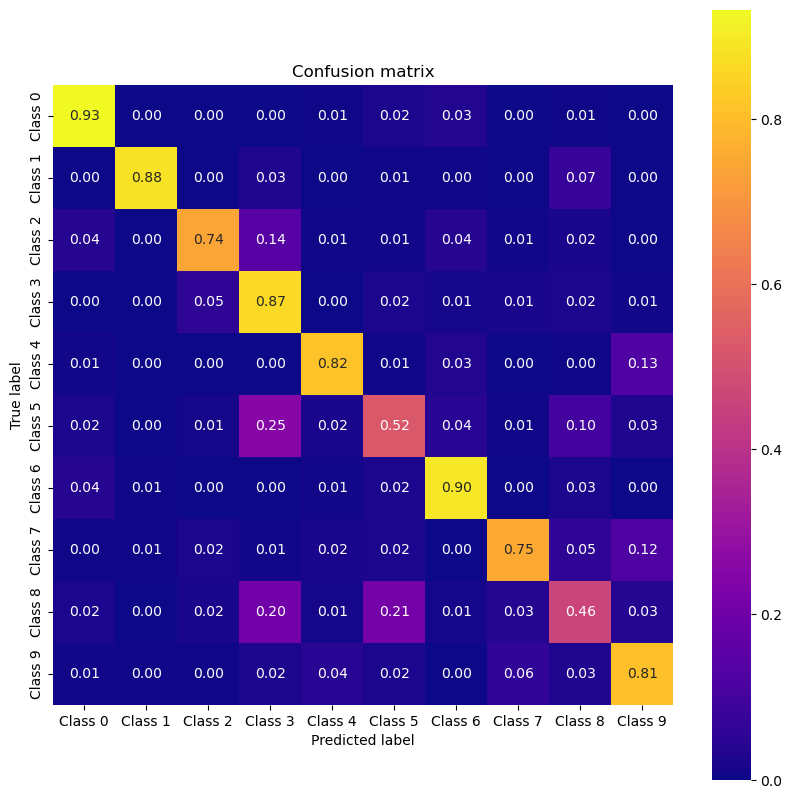

In [18]:
### Model evaluation

# Plot the loss and accuracy (at each epoch) for both datasets
plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

# Evaluate the cnn model
evaluate_model(rotnet, testloader, device)

**This model seems to be the best one for now. Personally, I would conserve this model because of the learning curve (an increasing function). But even if later we will find a better model, I am satisfied with the results : Implementing RotNet has been a rewarding experience for me. It gave me the opportunity to work with Pytorch for the first time, which was a valuable experience. It also allowed me to discover the self-supervised learning paradigm and its benefits (by predicting the rotation angle of an image, we can train a model with few labels).**

**Overall, implementing RotNet has broadened my understanding of deep learning and its applications, and I look forward to exploring more self-supervised learning techniques in the future.**

### CNN with data augmentation (BONUS)

**This is not the purpose of our project, but we took a look at data augmentation procedure to verify its performance :**

In [19]:
### Dataset and model preparation

# Extend the number of samples per label
traindata_extended = extend_mnist(traindata_reduced)

# Check the size of the datasets
print("Size of the train dataset :", len(traindata_extended), ",", traindata_extended[0][0].shape,
      "\nSize of the validation dataset :", len(validata_reduced), ",", validata_reduced[0][0].shape,
      "\nSize of the test dataset :", len(testdata), ",", testdata[0][0].shape, "\n")

# Load the datasets
trainloader = load_data(traindata_extended, 128, True, 0)
validloader = load_data(validata_reduced, 20, False, 0)
testloader = load_data(testdata, 128, False, 0)

Size of the train dataset : 880 , torch.Size([1, 28, 28]) 
Size of the validation dataset : 20 , torch.Size([1, 28, 28]) 
Size of the test dataset : 10000 , torch.Size([1, 28, 28]) 



**We will consider the same architecture as the baseline in order to verify whether the sample increase would improve our model or not.**

In [26]:
# Model summary

cnn_extended = CNN().to(device)
get_model_memory(cnn_extended)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=1024, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)
Model memory allocation : 2.11e+08

Total parameters : 6443370
Training parameters : 6443370


In [27]:
### Model training

# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_extended.parameters(), lr = 0.01)

# CNN training
epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : cnn_extended,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

cnn_extended, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

# Save the CNN model
save_model(cnn_extended, "../save/models/cnn_extended.pth")

 15%|█▌        | 3/20 [00:00<00:02,  6.87it/s]

| Epoch: 1/20 | Train: Loss 2.2419 Accuracy : 0.2830 | Val: Loss 2.2061 Accuracy : 0.3000

| Epoch: 2/20 | Train: Loss 1.6858 Accuracy : 0.4477 | Val: Loss 1.3518 Accuracy : 0.6000

| Epoch: 3/20 | Train: Loss 1.3729 Accuracy : 0.5864 | Val: Loss 1.0981 Accuracy : 0.6500

| Epoch: 4/20 | Train: Loss 1.0254 Accuracy : 0.6739 | Val: Loss 0.9043 Accuracy : 0.6000



 35%|███▌      | 7/20 [00:00<00:01, 11.95it/s]

| Epoch: 5/20 | Train: Loss 0.7373 Accuracy : 0.7898 | Val: Loss 0.5636 Accuracy : 0.7500

| Epoch: 6/20 | Train: Loss 0.3703 Accuracy : 0.8909 | Val: Loss 0.7083 Accuracy : 0.8500

| Epoch: 7/20 | Train: Loss 0.2565 Accuracy : 0.9364 | Val: Loss 0.5067 Accuracy : 0.9000

| Epoch: 8/20 | Train: Loss 0.1488 Accuracy : 0.9591 | Val: Loss 0.7093 Accuracy : 0.8500



 55%|█████▌    | 11/20 [00:00<00:00, 14.32it/s]

| Epoch: 9/20 | Train: Loss 0.0998 Accuracy : 0.9761 | Val: Loss 0.8669 Accuracy : 0.9000

| Epoch: 10/20 | Train: Loss 0.0405 Accuracy : 0.9920 | Val: Loss 0.7941 Accuracy : 0.8500

| Epoch: 11/20 | Train: Loss 0.0185 Accuracy : 0.9989 | Val: Loss 0.7319 Accuracy : 0.9000

| Epoch: 12/20 | Train: Loss 0.0145 Accuracy : 0.9977 | Val: Loss 0.7977 Accuracy : 0.8500



 75%|███████▌  | 15/20 [00:01<00:00, 15.41it/s]

| Epoch: 13/20 | Train: Loss 0.0155 Accuracy : 0.9977 | Val: Loss 0.8719 Accuracy : 0.8500

| Epoch: 14/20 | Train: Loss 0.0073 Accuracy : 1.0000 | Val: Loss 0.8405 Accuracy : 0.8000

| Epoch: 15/20 | Train: Loss 0.0059 Accuracy : 1.0000 | Val: Loss 0.7328 Accuracy : 0.9000

| Epoch: 16/20 | Train: Loss 0.0144 Accuracy : 0.9943 | Val: Loss 1.1548 Accuracy : 0.8500



100%|██████████| 20/20 [00:01<00:00, 13.04it/s]

| Epoch: 17/20 | Train: Loss 0.0112 Accuracy : 0.9989 | Val: Loss 1.0298 Accuracy : 0.8000

| Epoch: 18/20 | Train: Loss 0.0121 Accuracy : 0.9966 | Val: Loss 1.4784 Accuracy : 0.8000

| Epoch: 19/20 | Train: Loss 0.0215 Accuracy : 0.9920 | Val: Loss 1.2018 Accuracy : 0.7500

| Epoch: 20/20 | Train: Loss 0.0252 Accuracy : 0.9932 | Val: Loss 0.8811 Accuracy : 0.8500



**This model seems as fast as the baseline to train.**

Classification report :
              precision    recall  f1-score   support

     Class 0       0.87      0.96      0.91       980
     Class 1       0.91      0.94      0.93      1135
     Class 2       0.93      0.86      0.89      1032
     Class 3       0.71      0.91      0.80      1010
     Class 4       0.93      0.84      0.88       982
     Class 5       0.82      0.66      0.73       892
     Class 6       0.92      0.88      0.90       958
     Class 7       0.85      0.87      0.86      1028
     Class 8       0.77      0.76      0.76       974
     Class 9       0.85      0.81      0.83      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



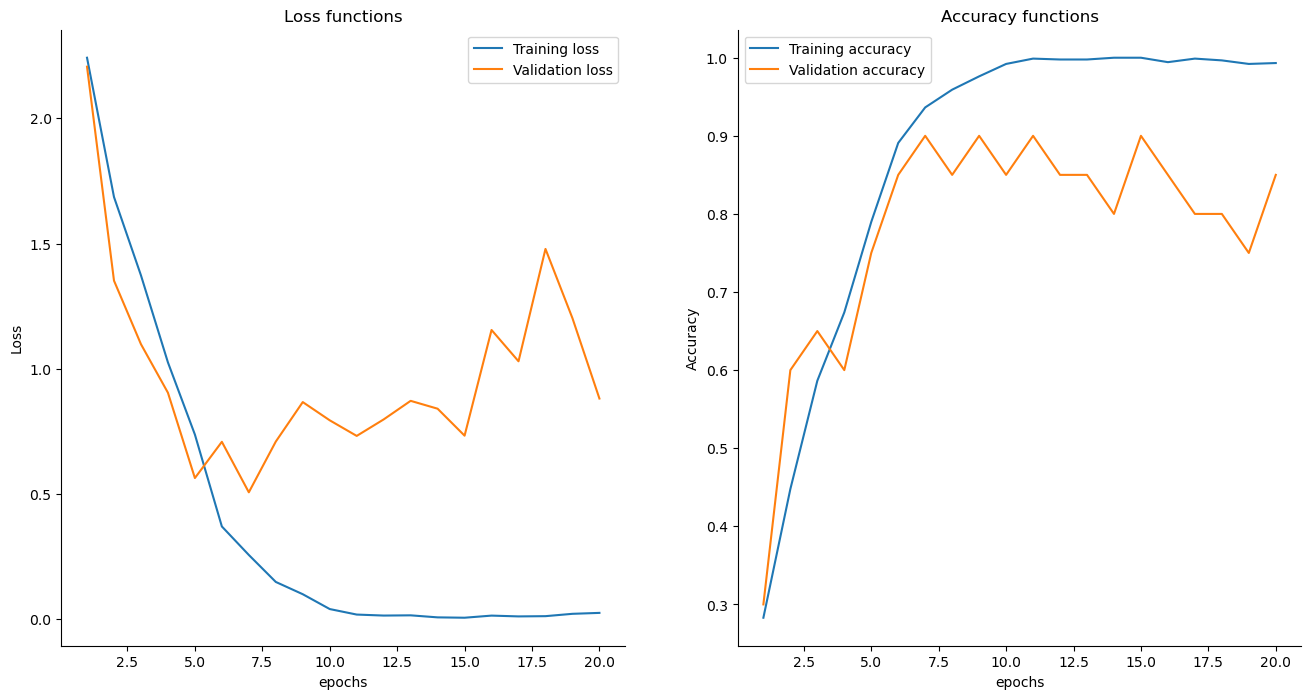

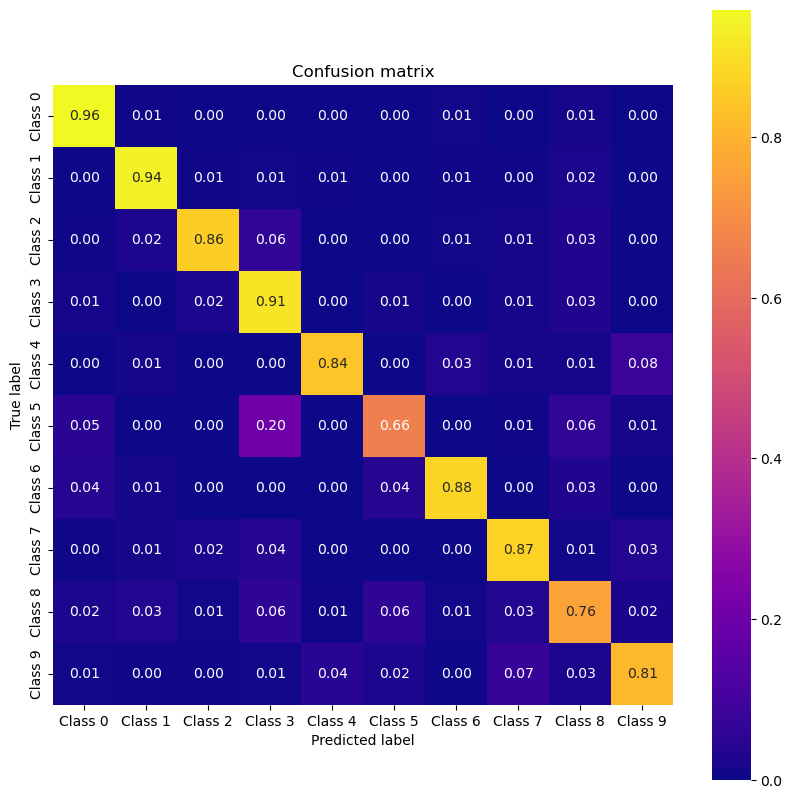

In [28]:
### Model evaluation

# Plot the loss and accuracy (at each epoch) for both datasets
plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

# Evaluate the cnn model
evaluate_model(cnn_extended, testloader, device)

**This model seems better than the CNN and RotNet. Thus, in our case, data augmentation is a valuable asset to increase our dataset but also to improve our models ! So an extension of our work would be to extend even further our reduced dataset (for instance thanks to GAN).**

### Rotnet with data augmentation (BONUS)

**We will start from the second step of the Rotnet (the transfer learning) but we will also consider data augmentation :**

In [20]:
### Fine tuning of the pre-trained model

rotnet_extended = ROTNET().to(device)
rotnet_extended.load_state_dict(torch.load("../save/models/rotnet_prime.pth", map_location = device))

# Freeze some parameters of the model
for name, param in rotnet_extended.named_parameters() :
    if param.requires_grad and 'conv' in name :
        param.requires_grad = False

# Retrieve the number of input features in last fully connected layer
number_features_last_layer = rotnet_extended.fc2.in_features
# Reinitialize the last layer with correct number of outputs
rotnet_extended.fc2 = nn.Linear(number_features_last_layer, 10)

# Model summary
rotnet_extended = rotnet_extended.to(device)
get_model_memory(rotnet_extended)

ROTNET(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)
Model memory allocation : 2.62e+08

Total parameters : 3333706
Training parameters : 3222538


In [21]:
### Model training

# Define the loss function and the optimizer

output_fn = nn.Softmax(dim = 1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, rotnet_extended.parameters()), lr = 0.01)

# CNN training
epochs = 20
args_train = {"train_loader" : trainloader,
              "val_loader" : validloader,
              "model" : rotnet_extended,
              "output_fn" : output_fn,
              "epochs" : epochs,
              "optimizer" : optimizer,
              "criterion" : criterion,
              "device" : device}

rotnet_extended, (loss_train, acc_train, loss_valid, acc_valid) = train_model(**args_train)

# Save the CNN model
save_model(rotnet_extended, "../save/models/rotnet_extended.pth")

 15%|█▌        | 3/20 [00:00<00:02,  7.48it/s]

| Epoch: 1/20 | Train: Loss 1.5243 Accuracy : 0.5398 | Val: Loss 1.4779 Accuracy : 0.5000

| Epoch: 2/20 | Train: Loss 1.1210 Accuracy : 0.6284 | Val: Loss 1.0459 Accuracy : 0.6500

| Epoch: 3/20 | Train: Loss 0.9080 Accuracy : 0.6989 | Val: Loss 0.8567 Accuracy : 0.6000

| Epoch: 4/20 | Train: Loss 0.7482 Accuracy : 0.7648 | Val: Loss 0.8469 Accuracy : 0.6500



 45%|████▌     | 9/20 [00:00<00:00, 15.10it/s]

| Epoch: 5/20 | Train: Loss 0.6233 Accuracy : 0.8125 | Val: Loss 0.8160 Accuracy : 0.7500

| Epoch: 6/20 | Train: Loss 0.5406 Accuracy : 0.8409 | Val: Loss 0.7632 Accuracy : 0.7000

| Epoch: 7/20 | Train: Loss 0.4449 Accuracy : 0.8727 | Val: Loss 0.8068 Accuracy : 0.7000

| Epoch: 8/20 | Train: Loss 0.3718 Accuracy : 0.9102 | Val: Loss 0.7934 Accuracy : 0.7000

| Epoch: 9/20 | Train: Loss 0.3222 Accuracy : 0.9193 | Val: Loss 0.8753 Accuracy : 0.7000



 65%|██████▌   | 13/20 [00:00<00:00, 17.11it/s]

| Epoch: 10/20 | Train: Loss 0.2733 Accuracy : 0.9386 | Val: Loss 0.8360 Accuracy : 0.8000

| Epoch: 11/20 | Train: Loss 0.2446 Accuracy : 0.9489 | Val: Loss 0.8094 Accuracy : 0.7000

| Epoch: 12/20 | Train: Loss 0.2093 Accuracy : 0.9602 | Val: Loss 0.8637 Accuracy : 0.7500

| Epoch: 13/20 | Train: Loss 0.1839 Accuracy : 0.9636 | Val: Loss 0.8561 Accuracy : 0.7500



 85%|████████▌ | 17/20 [00:01<00:00, 18.09it/s]

| Epoch: 14/20 | Train: Loss 0.1554 Accuracy : 0.9773 | Val: Loss 0.8565 Accuracy : 0.8000

| Epoch: 15/20 | Train: Loss 0.1367 Accuracy : 0.9773 | Val: Loss 0.8548 Accuracy : 0.7500

| Epoch: 16/20 | Train: Loss 0.1181 Accuracy : 0.9852 | Val: Loss 0.8830 Accuracy : 0.7500

| Epoch: 17/20 | Train: Loss 0.1034 Accuracy : 0.9943 | Val: Loss 0.8768 Accuracy : 0.7500

| Epoch: 18/20 | Train: Loss 0.0905 Accuracy : 0.9932 | Val: Loss 0.8744 Accuracy : 0.7500



100%|██████████| 20/20 [00:01<00:00, 14.68it/s]

| Epoch: 19/20 | Train: Loss 0.0802 Accuracy : 0.9966 | Val: Loss 0.9396 Accuracy : 0.7500

| Epoch: 20/20 | Train: Loss 0.0706 Accuracy : 0.9966 | Val: Loss 0.8916 Accuracy : 0.7500



Classification report :
              precision    recall  f1-score   support

     Class 0       0.91      0.90      0.91       980
     Class 1       0.97      0.92      0.94      1135
     Class 2       0.86      0.82      0.84      1032
     Class 3       0.66      0.87      0.75      1010
     Class 4       0.91      0.85      0.88       982
     Class 5       0.80      0.63      0.70       892
     Class 6       0.89      0.93      0.91       958
     Class 7       0.81      0.88      0.85      1028
     Class 8       0.70      0.65      0.68       974
     Class 9       0.81      0.79      0.80      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



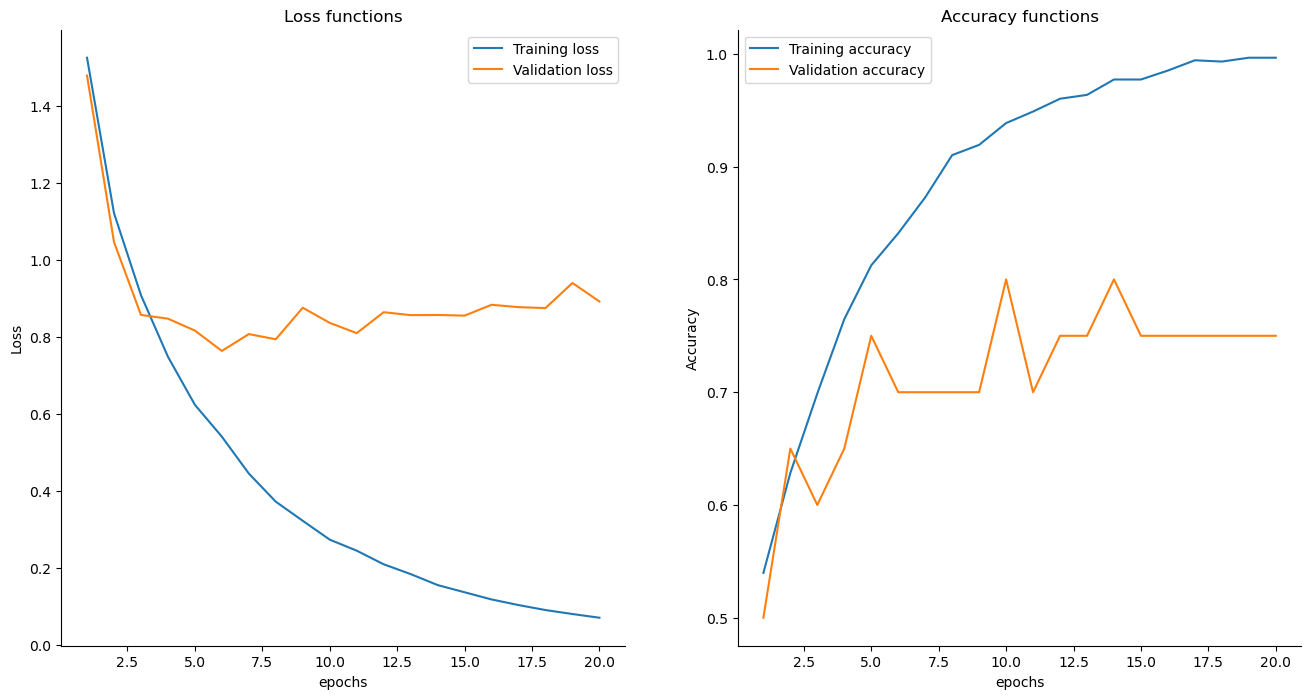

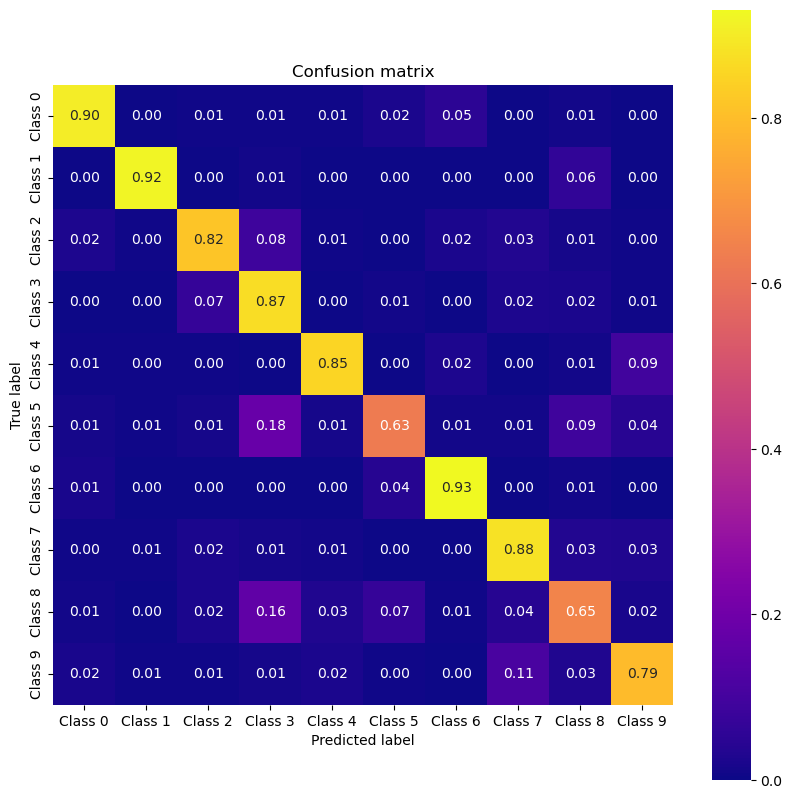

In [22]:
### Model evaluation

# Plot the loss and accuracy (at each epoch) for both datasets
plot_accuracy(epochs, loss_train, loss_valid, acc_train, acc_valid)

# Evaluate the cnn model
evaluate_model(rotnet_extended, testloader, device)

**The moddel seems better that the original RotNet and as performant as the CNN with data augmentation.**

**We may acknowledge that our RotNet architecture is maybe not the best one for the MNIST dataset (so this may be the reason why RotNet has roughly the same performance as the CNN).**